# In this notebook we analyze the results from first_pass.jl of rho(epsilon)

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from typing import Dict

sns.set_theme(style="darkgrid", palette="deep")

In [134]:
# Data params

# L_vals = [8000, 10_000, 12_000, 14_000, 16_000, 18_000, 20_000]
L_vals = [8000, 10000]
# epsilon_vals = sorted(set([round(0.001 * i, ndigits=4) for i in range(0, 350)] + [round(0.291 + 0.0001 * i, ndigits=4) for i in range(0, 60+1)]))
epsilon_vals = [round(0.291 + 0.0001 * i, ndigits=4) for i in range(0, 60+1)]

time_prefact = 200

num_initial_conds = 500
initial_state_prob = 0.5



In [135]:

avrage_rho_per_ep : Dict[int, Dict[float, float]] = {}
sem_rho_per_ep : Dict[int, Dict[float, float]] = {}

for L_val in L_vals:
    avrage_rho_per_ep[L_val] = {}
    sem_rho_per_ep[L_val] = {}
    for epsilon_val in epsilon_vals:

        sample_filepath = f"data/rho_per_epsilon/IC1/L{L_val}/IC1_L{L_val}_epsilon{str(epsilon_val).replace("0.", "0p")}.csv"
        
        sample_df = pd.read_csv(sample_filepath)

        avrage_rho_per_ep[L_val][epsilon_val] = sample_df["rho"].mean()
        sem_rho_per_ep[L_val][epsilon_val] = sample_df["rho"].sem()
        

In [136]:
avrage_rho_per_ep[8000].keys()

dict_keys([0.291, 0.2911, 0.2912, 0.2913, 0.2914, 0.2915, 0.2916, 0.2917, 0.2918, 0.2919, 0.292, 0.2921, 0.2922, 0.2923, 0.2924, 0.2925, 0.2926, 0.2927, 0.2928, 0.2929, 0.293, 0.2931, 0.2932, 0.2933, 0.2934, 0.2935, 0.2936, 0.2937, 0.2938, 0.2939, 0.294, 0.2941, 0.2942, 0.2943, 0.2944, 0.2945, 0.2946, 0.2947, 0.2948, 0.2949, 0.295, 0.2951, 0.2952, 0.2953, 0.2954, 0.2955, 0.2956, 0.2957, 0.2958, 0.2959, 0.296, 0.2961, 0.2962, 0.2963, 0.2964, 0.2965, 0.2966, 0.2967, 0.2968, 0.2969, 0.297])

# Basic plot of 1-rho per epsilon

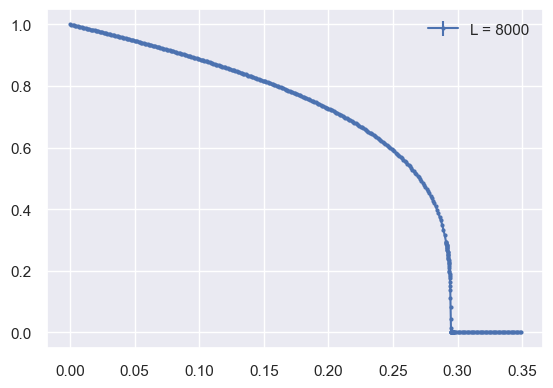

In [122]:

for L in L_vals:
    epsilon_vals = sorted(list(avrage_rho_per_ep[L].keys()))
    plt.errorbar(
        epsilon_vals, 
        [1-avrage_rho_per_ep[L][epsilon_val] for epsilon_val in epsilon_vals], 
        yerr=[sem_rho_per_ep[L][epsilon_val] for epsilon_val in epsilon_vals],
        label = f"L = {L}",
        fmt='-o',  
        markersize=3
        )

plt.legend()
plt.show()


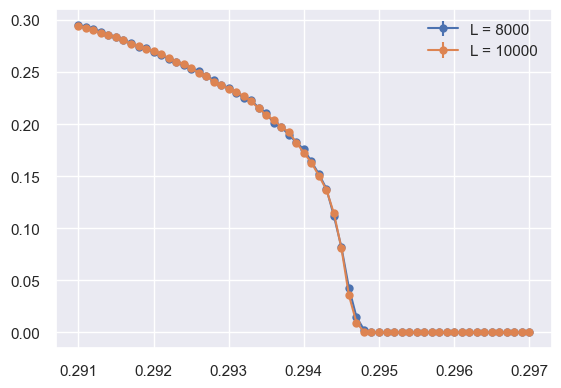

In [137]:
trans_window = (0.291, 0.297)

for L in L_vals:
    epsilon_vals = sorted([epsilon for epsilon in avrage_rho_per_ep[L].keys() if trans_window[0] <= epsilon <= trans_window[1]])
    plt.errorbar(
        epsilon_vals, 
        [1-avrage_rho_per_ep[L][epsilon_val] for epsilon_val in epsilon_vals], 
        yerr=[sem_rho_per_ep[L][epsilon_val] for epsilon_val in epsilon_vals],
        label = f"L = {L}",
        fmt='-o',  
        # markersize=2
        )

plt.legend()
plt.show()

np.float64(1.0)